# Import Library

In [1]:
%matplotlib inline

import os

import tensorflow.keras as keras
import numpy as np
import matplotlib.pyplot as plt

from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, Input, Activation, add, Add, Dropout, BatchNormalization
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split

from IPython.display import SVG
from tensorflow.python.keras.utils.vis_utils import model_to_dot

random_state = 42

# Read data and reshape
- format max size 255
- deploy list
- classification to 10type classes
- split dataes

In [3]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

x_train = x_train.astype('float32') / 255
y_train = np.eye(10)[y_train.astype('int32').flatten()]

x_test = x_test.astype('float32') / 255
y_test = np.eye(10)[y_test.astype('int32').flatten()]

x_train, x_valid, y_train, y_valid = train_test_split(
    x_train, y_train, test_size=10000)

170500096/170498071 [==============================] - 45s 0us/step


In [4]:
# Define labels
cifar10_labels = np.array([
    'airplane',
    'automobile',
    'bird',
    'cat',
    'deer',
    'dog',
    'frog',
    'horse',
    'ship',
    'truck'])

# Check Datas

In [5]:
# check data size
x_train.shape

(40000, 32, 32, 3)

In [6]:
np.argmax(y_train[1])

2

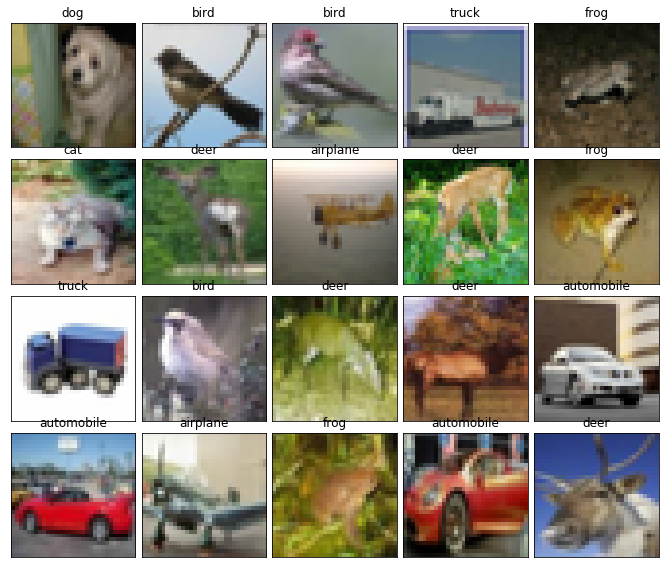

In [7]:
# check images
fig = plt.figure(figsize=(9, 15))
fig.subplots_adjust(left=0, right=1, bottom=0, top=0.5, hspace=0.05,
                    wspace=0.05)

for i in range(20):
    ax = fig.add_subplot(4, 5, i + 1, xticks=[], yticks=[])
    ax.imshow(x_train[i])
    plt.title(cifar10_labels[np.argmax(y_train[i])])

# Model

In [8]:
kernel_size = (3,3)
pool_size = (2,2)

model = Sequential()

model.add(Conv2D(16, kernel_size=kernel_size, activation='relu',
                 kernel_initializer='he_normal', input_shape=(32, 32, 3)))  # 32x32x3 -> 28x28x6
model.add(MaxPooling2D(pool_size=(2, 2)))  # 28x28x6 -> 14x14x6

model.add(Conv2D(32, kernel_size=kernel_size, activation='relu',
                 kernel_initializer='he_normal'))  # 14x14x6 -> 10x10x16
model.add(MaxPooling2D(pool_size=(2, 2)))  # 10x10x16 -> 5x5x16

model.add(Flatten())  # 5x5x16 -> 400
model.add(Dense(120, activation='relu',
                kernel_initializer='he_normal'))  # 400 ->120

model.add(Dense(84, activation='relu', kernel_initializer='he_normal'))  # 120 ->84
model.add(Dense(10, activation='softmax'))  # 84 ->10

model.compile(
    loss=keras.losses.categorical_crossentropy,
    optimizer='adam',
    metrics=['accuracy']
)

Instructions for updating:
Colocations handled automatically by placer.


In [9]:
early_stopping = EarlyStopping(patience=1, verbose=1)
fit = model.fit(x=x_train, y=y_train, batch_size=128, epochs=10, verbose=1,
          validation_data=(x_valid, y_valid), callbacks=[early_stopping])

Train on 40000 samples, validate on 10000 samples
Instructions for updating:
Use tf.cast instead.
Epoch 1/10
40000/40000 [==============================] - 8s 196us/sample - loss: 1.6764 - acc: 0.3898 - val_loss: 1.4081 - val_acc: 0.4976
Epoch 2/10
40000/40000 [==============================] - 8s 188us/sample - loss: 1.3008 - acc: 0.5368 - val_loss: 1.2461 - val_acc: 0.5641
Epoch 3/10
40000/40000 [==============================] - 8s 189us/sample - loss: 1.1716 - acc: 0.5852 - val_loss: 1.1830 - val_acc: 0.5860
Epoch 4/10
40000/40000 [==============================] - 8s 191us/sample - loss: 1.0914 - acc: 0.6137 - val_loss: 1.1536 - val_acc: 0.5975
Epoch 5/10
40000/40000 [==============================] - 8s 190us/sample - loss: 1.0234 - acc: 0.6408 - val_loss: 1.0868 - val_acc: 0.6222
Epoch 6/10
40000/40000 [==============================] - 8s 192us/sample - loss: 0.9648 - acc: 0.6605 - val_loss: 1.0787 - val_acc: 0.6276
Epoch 7/10
40000/40000 [==============================] - 7s 1

## Plot learning history

In [10]:
# loss
def plot_history_loss(fit):
    # Plot the loss in the history
    axL.plot(fit.history['loss'],label="loss for training")
    axL.plot(fit.history['val_loss'],label="loss for validation")
    axL.set_title('model loss')
    axL.set_xlabel('epoch')
    axL.set_ylabel('loss')
    axL.legend(loc='upper right')

# acc
def plot_history_acc(fit):
    # Plot the loss in the history
    axR.plot(fit.history['acc'],label="loss for training")
    axR.plot(fit.history['val_acc'],label="loss for validation")
    axR.set_title('model accuracy')
    axR.set_xlabel('epoch')
    axR.set_ylabel('accuracy')
    axR.legend(loc='upper right')

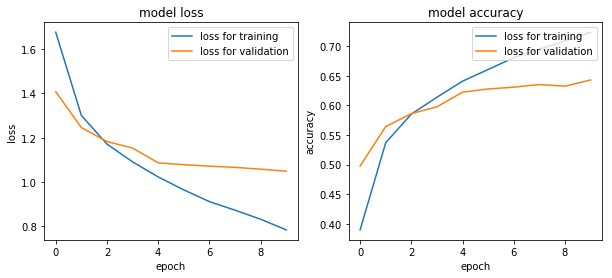

In [11]:
fig, (axL, axR) = plt.subplots(ncols=2, figsize=(10,4))
plot_history_loss(fit)
plot_history_acc(fit)
# fig.savefig('./Cifar10_learning.png')

# Save trained model

In [12]:
model.save('./cifar10_cnn.h5')

from tensorflow.keras.models import load_model

model = load_model('./cifar10_cnn.h5')

# Predict

<Figure size 648x1080 with 0 Axes>

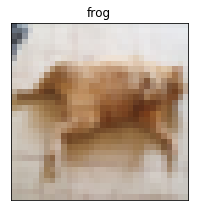

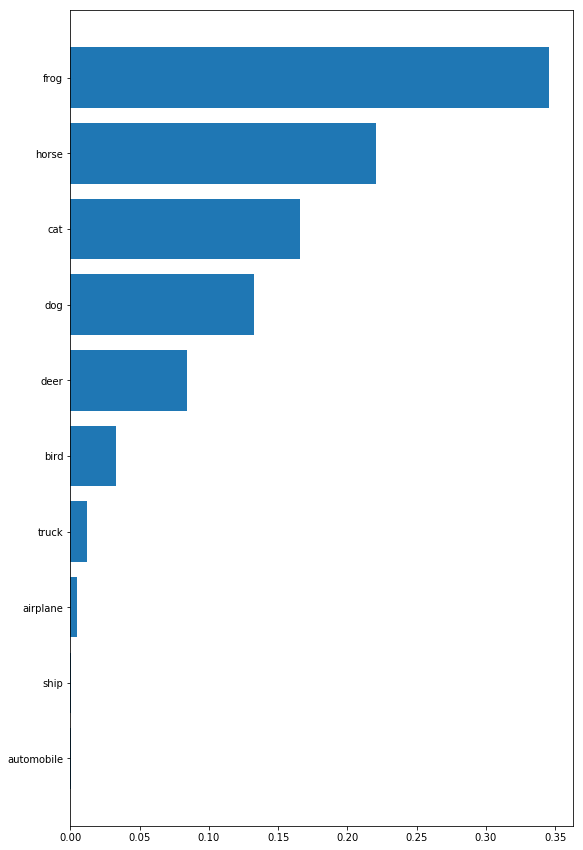

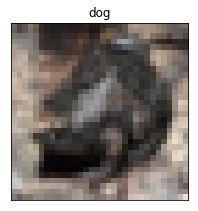

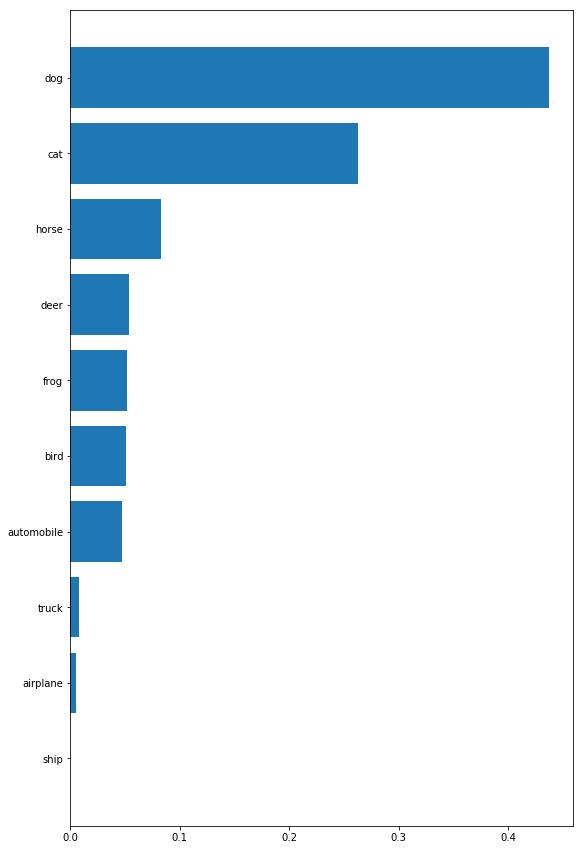

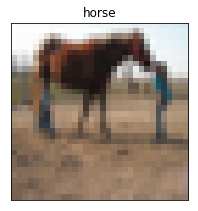

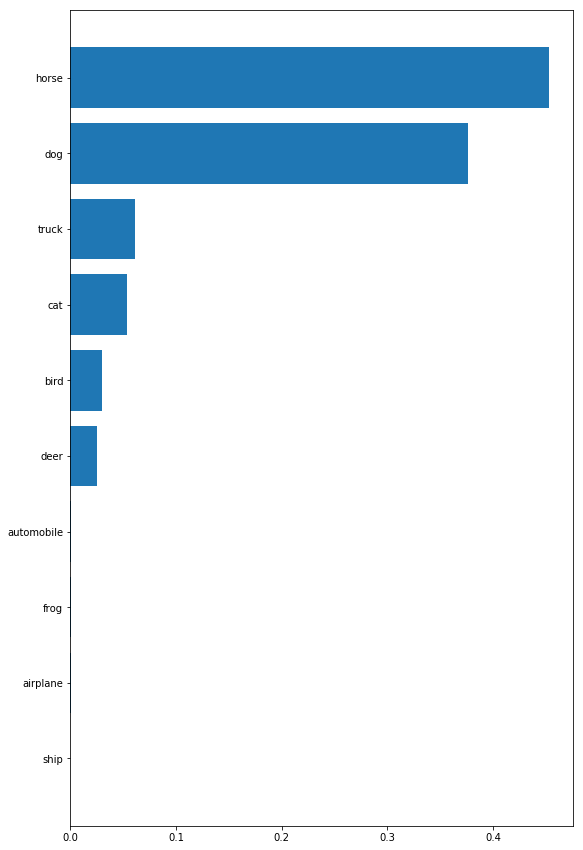

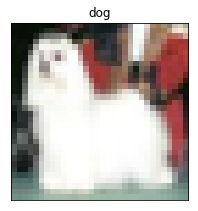

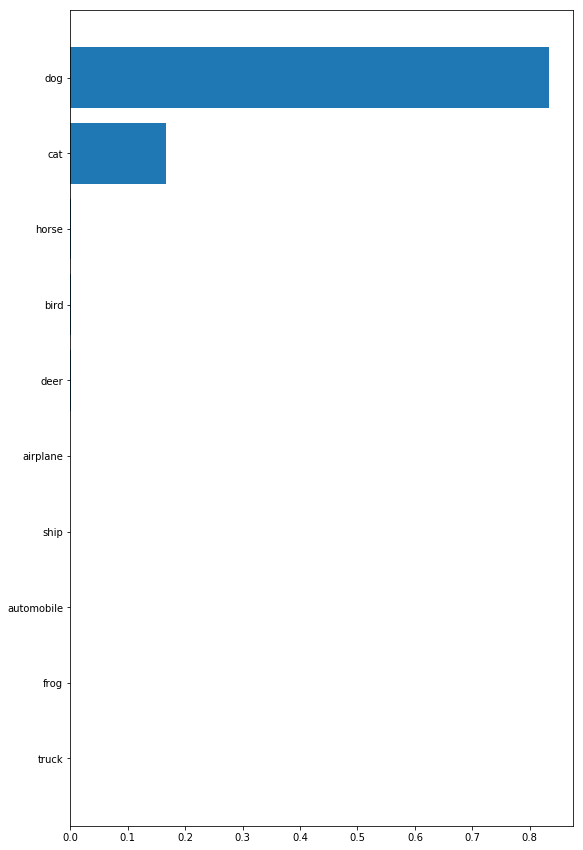

In [13]:
y_pred = model.predict(x_valid)
y_proba = model.predict_proba(x_valid)
fig = plt.figure(figsize=(9, 15))
fig.subplots_adjust(left=0, right=1, bottom=0, top=0.5, hspace=0.05,
                    wspace=0.05)

num = 4
for i in range(num):
    fig = plt.figure(figsize=(9, 15))
    y = y_pred[i].argmax()
    ax = fig.add_subplot(num,1, i+1, xticks=[], yticks=[])
    ax.imshow(x_valid[i])
    plt.title(cifar10_labels[np.argmax(y_pred[i])])
    fig = plt.figure(figsize=(9, 15))
    plt.barh(np.arange(0,10),y_proba[i][y_proba[i].argsort()[::1]])
    plt.yticks(np.arange(0,10),cifar10_labels[y_proba[i].argsort()[::1]])
    plt.show()
    